<a href="https://colab.research.google.com/github/berenicehdr/SaturdaysAI_Fem/blob/master/SaturdaysAI_Fem_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python version

In [0]:
#https://towardsdatascience.com/predicting-weekly-hotel-cancellations-with-an-lstm-network-c82789028ea1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from platform import python_version
print(python_version())

3.6.9


## Import Libraries

In [21]:
import tensorflow as tf
print(tf.__version__)
tf.random.set_seed(1234)

import numpy as np
from numpy.random import seed
seed(1)

import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame  
dtypes = {
        'count':                                    'float64'
        }
train_df = pd.read_csv("/content/drive/My Drive/hotel-modelling-master/notebooks and datasets/time-series/data_by_week.csv", dtype=dtypes, converters={'nweek': '{:0>2}'.format})        

2.2.0


## Data Import and Manipulation

In [0]:
a=train_df.head()
b=train_df
c=b.sort_values(['year','nweek'], ascending=True)
c=pd.DataFrame(c)
b=train_df
c=b.sort_values(['year','nweek'], ascending=True)
c=pd.DataFrame(c)
df = DataFrame(c, columns= ['year', 'nweek']) 
# https://datatofish.com/concatenate-values-python/
df1 = df['year'].map(str) + df['nweek'].map(str)
df1=pd.DataFrame(df1)
df2 = DataFrame(c, columns= ['count']) 
df3=pd.concat([df1, df2], axis = 1)
df3.columns = ['FullDate', 'count1']
df3.sort_values(['FullDate','count1'], ascending=True)
df4 = df3.groupby('FullDate').agg("mean")
df4.sort_values(['FullDate'], ascending=True)
tseries=df4['count1']

In [0]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

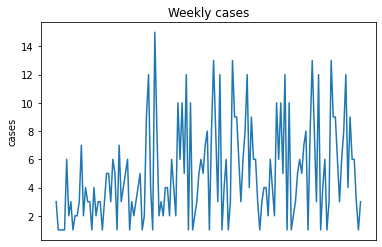

In [24]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('cases')
plt.title("Weekly cases")
plt.show()

In [0]:
df=pd.DataFrame(tseries)
df.to_csv("weekly cases.csv", sep='\t', encoding='utf-8')
df = df[:99]
df

### Form dataset matrix

In [0]:
#separa x y y 
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        print("this is ",a)
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

## Normalize dataset with MinMaxScaler

In [11]:
np.max(df)

count1    15.0
dtype: float64

In [12]:
np.min(df)

count1    1.0
dtype: float64

In [13]:
#contiene todos los datos 
df.shape

(99, 1)

In [0]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
df = scaler.fit_transform(df)
df

## Configure LSTM model

In [0]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
#!!!!!!!!!!!!!
# Training and Validation data partition
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size

train, val = df[0:train_size,:], df[train_size:len(df),:]

# Number of previous
previous = 5
X_train, Y_train = create_dataset(train, previous)
X_val, Y_val = create_dataset(val, previous)

In [0]:
X_train

In [0]:
Y_train

Epoch 1/100
15/15 - 0s - loss: 0.0859 - val_loss: 0.1221
Epoch 2/100
15/15 - 0s - loss: 0.0686 - val_loss: 0.1009
Epoch 3/100
15/15 - 0s - loss: 0.0568 - val_loss: 0.0869
Epoch 4/100
15/15 - 0s - loss: 0.0493 - val_loss: 0.0786
Epoch 5/100
15/15 - 0s - loss: 0.0458 - val_loss: 0.0745
Epoch 6/100
15/15 - 0s - loss: 0.0440 - val_loss: 0.0728
Epoch 7/100
15/15 - 0s - loss: 0.0439 - val_loss: 0.0718
Epoch 8/100
15/15 - 0s - loss: 0.0431 - val_loss: 0.0715
Epoch 9/100
15/15 - 0s - loss: 0.0431 - val_loss: 0.0714
Epoch 10/100
15/15 - 0s - loss: 0.0428 - val_loss: 0.0710
Epoch 11/100
15/15 - 0s - loss: 0.0426 - val_loss: 0.0709
Epoch 12/100
15/15 - 0s - loss: 0.0425 - val_loss: 0.0706
Epoch 13/100
15/15 - 0s - loss: 0.0423 - val_loss: 0.0704
Epoch 14/100
15/15 - 0s - loss: 0.0422 - val_loss: 0.0703
Epoch 15/100
15/15 - 0s - loss: 0.0422 - val_loss: 0.0702
Epoch 16/100
15/15 - 0s - loss: 0.0420 - val_loss: 0.0699
Epoch 17/100
15/15 - 0s - loss: 0.0420 - val_loss: 0.0698
Epoch 18/100
15/15 - 0s

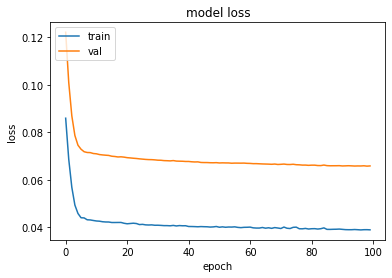

In [32]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(12, input_shape=(1, previous)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=4, verbose=2)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [34]:
trainpred.shape

(73, 1)

In [0]:
Y_train.shape

In [0]:
valpred

In [0]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred

In [0]:

Y_val.shape
X_train.shape
X_val.shape
Y_val

In [36]:
Y_train

array([[ 6.,  2.,  3.,  1.,  2.,  2.,  3.,  7.,  2.,  4.,  3.,  3.,  1.,
         4.,  2.,  3.,  3.,  1.,  3.,  5.,  5.,  3.,  6.,  5.,  1.,  7.,
         3.,  4.,  5.,  6.,  1.,  3.,  2.,  3.,  4.,  5.,  1.,  2.,  9.,
        12.,  4.,  1., 15.,  8.,  2.,  3.,  2.,  4.,  4.,  2.,  6.,  4.,
         2., 10.,  6., 10.,  5., 12.,  1., 10.,  1.,  2.,  3.,  5.,  6.,
         5.,  7.,  8.,  1.,  8., 13.,  8.,  3.]])

In [0]:
X_train

In [0]:
X_val

In [37]:
import math
from sklearn.metrics import mean_squared_error

# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 2.95 RMSE
Validation Score: 4.13 RMSE


In [0]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[previous:len(trainpred)+previous, :] = trainpred

In [0]:
# Validation predictions
valpredPlot = np.empty_like(df)
valpredPlot[:, :] = np.nan
valpredPlot[len(trainpred)+(previous*2)+1:len(df)-1, :] = valpred

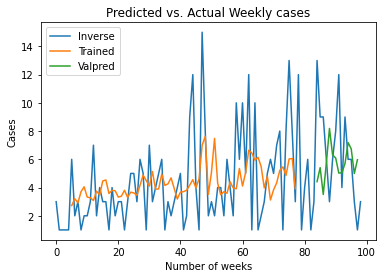

In [40]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df),label='Inverse')
trainpred, =plt.plot(trainpredPlot, label='Trained')
valpred, =plt.plot(valpredPlot, label='Valpred')
plt.xlabel('Number of weeks')
plt.ylabel('Cases')
plt.title("Predicted vs. Actual Weekly cases")
plt.legend(loc = 'upper left')
plt.show()

In [0]:
Y_val=Y_val.reshape(-1)
Y_val.shape
Y_val=pd.Series(Y_val)

In [0]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [0]:
predictions

In [0]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [44]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(Y_val, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 4.128949


In [0]:
forecast_error = (predictions-Y_val)
forecast_error

In [46]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-1.046022926058088

In [0]:
X_train

In [0]:
X_train.shape

## Validate Predictions on Test Data

In [0]:
Xnew = np.array([tseries.iloc[100:105],tseries.iloc[101:106],tseries.iloc[102:107],tseries.iloc[103:108],tseries.iloc[104:109],tseries.iloc[105:110],tseries.iloc[106:111],tseries.iloc[107:112],tseries.iloc[108:113],tseries.iloc[109:114],tseries.iloc[110:115],tseries.iloc[111:116],tseries.iloc[112:117],tseries.iloc[113:118],tseries.iloc[114:119]])

In [0]:
Xnew.shape

In [0]:
Xnew = scaler.fit_transform(Xnew)
Xnew
Xnewformat = np.reshape(Xnew, (Xnew.shape[0], 1, Xnew.shape[1]))
ynew=model.predict(Xnewformat)

In [49]:
Xnew.shape
ynew.shape
type(ynew)
ynew.shape

(15, 1)

In [0]:
actual = tseries.iloc[100:115]
actual

In [51]:
actual = np.array(actual)
actual

array([ 4.,  2.,  6.,  4.,  2., 10.,  6., 10.,  5., 12.,  1., 10.,  1.,
        2.,  3.])

In [52]:
actual=actual.reshape(15,-1)
actual.shape

(15, 1)

In [0]:
actual

In [0]:
ynew=ynew.reshape(-1)
actual=actual.reshape(-1)
actualpd=pd.Series(actual)

In [0]:
ynew.shape

(15,)

In [0]:
ynew

array([0.30761704, 0.43710563, 0.31837222, 0.4083848 , 0.5502678 ,
       0.5192634 , 0.4973721 , 0.5011029 , 0.48459512, 0.29174653,
       0.4173595 , 0.21416196, 0.30019888, 0.34330514, 0.42169997],
      dtype=float32)

In [0]:
maxt=np.max(tseries)
mint=np.min(tseries)


In [0]:
ynew = ynew * np.abs(maxt-mint) + np.min(tseries)
ynewpd=pd.Series(ynew)

In [0]:
actualpd

In [0]:
ynewpd

In [62]:
mse = mean_squared_error(actualpd, ynewpd)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 3.893157


In [0]:
forecast_error = (ynewpd-actualpd)
forecast_error

In [0]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

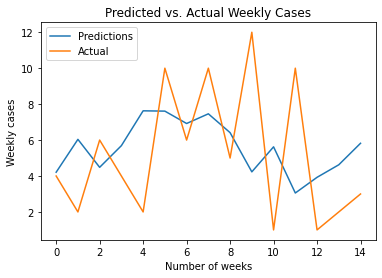

In [0]:
predictons, =plt.plot(ynewpd, label='Predictions')
actual, =plt.plot(actualpd, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Weekly cases')
plt.title("Predicted vs. Actual Weekly Cases")
plt.legend(loc = 'upper left')
plt.show()

In [65]:
np.mean(actualpd)

5.2

Referencias :
https://towardsdatascience.com/predicting-weekly-hotel-cancellations-with-an-lstm-network-c82789028ea1